## Data Loading:

In [115]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignore a specific warning (e.g., a FutureWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
# Reset warnings to their default behavior
warnings.filterwarnings('default')

In [116]:
dataset=pd.read_csv('Major_Crime_Indicators_Open_Data.csv')
# DOWNLOAD LINK:
#     https://open.toronto.ca/dataset/major-crime-indicators/

# keeping original data in dataset and coping data in dataframe data
data=dataset[:]
data.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.425896,43.757346,1,GO-20141262074,2014/01/01 05:00:00+00,1998/06/01 04:00:00+00,2014,January,1,1,...,1480,110,Administering Noxious Thing,Assault,38,Lansing-Westgate,38,Lansing-Westgate (38),-79.425896,43.757346
1,-79.350229,43.646293,2,GO-20141260701,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,2120,200,B&E,Break and Enter,70,South Riverdale,70,South Riverdale (70),-79.350229,43.646293
2,-79.376497,43.666423,3,GO-20141260889,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,74,North St.James Town,74,North St.James Town (74),-79.376497,43.666423
3,-85.488744,0.000000,4,GO-20141260973,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,2130,210,Theft Over,Theft Over,NSA,NSA,NSA,NSA,-85.488744,0.000000
4,-79.344839,43.678946,5,GO-20141261050,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,69,Blake-Jones,66,Danforth (66),-79.344839,43.678946


## Data Cleaning:

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323296 entries, 0 to 323295
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   X                  323296 non-null  float64
 1   Y                  323296 non-null  float64
 2   OBJECTID           323296 non-null  int64  
 3   EVENT_UNIQUE_ID    323296 non-null  object 
 4   REPORT_DATE        323296 non-null  object 
 5   OCC_DATE           323296 non-null  object 
 6   REPORT_YEAR        323296 non-null  int64  
 7   REPORT_MONTH       323296 non-null  object 
 8   REPORT_DAY         323296 non-null  int64  
 9   REPORT_DOY         323296 non-null  int64  
 10  REPORT_DOW         323296 non-null  object 
 11  REPORT_HOUR        323296 non-null  int64  
 12  OCC_YEAR           323191 non-null  float64
 13  OCC_MONTH          323191 non-null  object 
 14  OCC_DAY            323191 non-null  float64
 15  OCC_DOY            323191 non-null  float64
 16  OC

In [118]:
# changing character values into integer in a column that has integer type data 
data['HOOD_158'] = pd.to_numeric(data['HOOD_158'], errors='coerce')
# changing datatypes from float to int
data['OCC_YEAR']=pd.to_numeric(data['OCC_YEAR'], errors='coerce')
data['OCC_DAY']=pd.to_numeric(data['OCC_DAY'], errors='coerce')
data['HOOD_158']=pd.to_numeric(data['HOOD_158'], errors='coerce')

In [119]:
# dropping columns we dont need for our analysis
data = data.drop(['X', 'Y','OBJECTID','EVENT_UNIQUE_ID','REPORT_DOY','OCC_DOY','UCR_CODE',
       'UCR_EXT', 'HOOD_140', 'NEIGHBOURHOOD_140','OCC_DATE','LOCATION_TYPE'],axis=1)
data.sample()

,REPORT_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_HOUR,DIVISION,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84
238443,2020/09/30 04:00:00+00,2020,September,30,Wednesday,12,2020.0,September,30.0,Wednesday,11,D43,House,B&E,Break and Enter,135.0,Morningside,-79.202278,43.793647


In [120]:
# finding the total duplicates rows
data.duplicated().sum()

24207

In [121]:
# removing the duplicates rows
data.drop_duplicates().head()

,REPORT_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_HOUR,DIVISION,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84
0,2014/01/01 05:00:00+00,2014,January,1,Wednesday,12,NaN,NaN,NaN,NaN,12,D32,Apartment,Administering Noxious Thing,Assault,38.0,Lansing-Westgate,-79.425896,43.757346
1,2014/01/01 05:00:00+00,2014,January,1,Wednesday,3,2014.0,January,1.0,Wednesday,3,D51,Commercial,B&E,Break and Enter,70.0,South Riverdale,-79.350229,43.646293
2,2014/01/01 05:00:00+00,2014,January,1,Wednesday,4,2014.0,January,1.0,Wednesday,4,D51,Apartment,Assault,Assault,74.0,North St.James Town,-79.376497,43.666423
3,2014/01/01 05:00:00+00,2014,January,1,Wednesday,4,2014.0,January,1.0,Wednesday,4,NSA,Outside,Theft Over,Theft Over,NaN,NSA,-85.488744,0.000000
4,2014/01/01 05:00:00+00,2014,January,1,Wednesday,4,2014.0,January,1.0,Wednesday,4,D54,Outside,Assault,Assault,69.0,Blake-Jones,-79.344839,43.678946


In [122]:
# finding the % of missing data on each column
(data.isna().sum()/len(data))*100

REPORT_DATE          0.000000
REPORT_YEAR          0.000000
REPORT_MONTH         0.000000
REPORT_DAY           0.000000
REPORT_DOW           0.000000
REPORT_HOUR          0.000000
OCC_YEAR             0.032478
OCC_MONTH            0.032478
OCC_DAY              0.032478
OCC_DOW              0.032478
OCC_HOUR             0.000000
DIVISION             0.000000
PREMISES_TYPE        0.000000
OFFENCE              0.000000
MCI_CATEGORY         0.000000
HOOD_158             1.618950
NEIGHBOURHOOD_158    0.000000
LONG_WGS84           0.000000
LAT_WGS84            0.000000
dtype: float64

In [123]:
data.shape[0]

323296

In [124]:
# finding columns which contain empty values less than threshold value (5%)
threshold=len(data)*0.05
cols_drop=data.columns[ (data.isna().sum()>0 ) & (data.isna().sum()<=threshold)]
cols_drop

Index(['OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOW', 'HOOD_158'], dtype='object')

- Column 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOW', 'HOOD_158' has missing values which are less than the threshold value(5% of total value). So instead of filling these NaN value with other value we will drop these value.

In [125]:
# removig the rows with NaN value if they are less than 5 %
data=data.dropna(subset=cols_drop)

In [126]:
# total records after dropping duplicates and NaN values
data.shape[0]

317968

In [127]:
# again checking for Nan values
data.isna().sum()

REPORT_DATE          0
REPORT_YEAR          0
REPORT_MONTH         0
REPORT_DAY           0
REPORT_DOW           0
REPORT_HOUR          0
OCC_YEAR             0
OCC_MONTH            0
OCC_DAY              0
OCC_DOW              0
OCC_HOUR             0
DIVISION             0
PREMISES_TYPE        0
OFFENCE              0
MCI_CATEGORY         0
HOOD_158             0
NEIGHBOURHOOD_158    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64

- Now in all the columns there are no missing values and we can perform our analysis.

## Feature Engineering:

In [128]:
# Define the conditions for each season
months = [
    (data['OCC_MONTH'].isin(['March','April','May'])),  # Spring (March to May)
    (data['OCC_MONTH'].isin(['June','July','August'])),  # Summer (June to August)
    (data['OCC_MONTH'].isin(['September','October','November'])),  # Fall (September to November)
    (data['OCC_MONTH'].isin(['December','January','February']))  # Winter (December to February)
]

# Define the corresponding season labels
season_type = ['Spring', 'Summer', 'Fall', 'Winter']

# Create a new 'season' column based on the conditions
data["season"] = np.select(months, season_type, default="Other")


In [129]:
# Define the conditions for each part of the day
day_parts = [
    (data['OCC_HOUR'].between(6, 11,inclusive='both')),       # Morning (6:00 AM - 11:59 AM)
    (data['OCC_HOUR'].between(12, 16,inclusive='both')),      # Afternoon (12:00 PM - 4:59 PM)
    (data['OCC_HOUR'].between(17, 20,inclusive='both')),      # Evening (5:00 PM - 8:59 PM)
    (data['OCC_HOUR'].between(21, 23,inclusive='both')) | (data['OCC_HOUR'].between(0, 5,inclusive='both'))  # Night (9:00 PM - 5:59 AM next day)
]

# Define the corresponding labels for each part of the day
day_parts_labels = ['Morning', 'Afternoon', 'Evening', 'Night']

# Create a new 'day_part' column based on the conditions
data["day_parts"] = np.select(day_parts, day_parts_labels, default="Other")
# data["day_parts"].unique()


## Data Manipulation and Data Visualization:

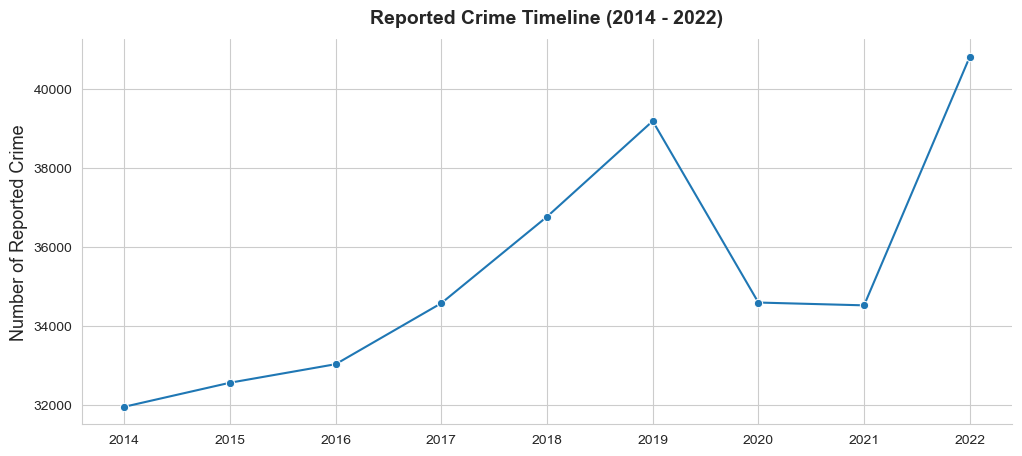

In [130]:
crime_trend_year=data.groupby('REPORT_YEAR').agg({'OFFENCE':'count'}).reset_index()
# crime_trend_year
plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
sns.lineplot(data=crime_trend_year,x='REPORT_YEAR',y='OFFENCE',marker='o')
sns.despine()
plt.xlabel('')
plt.ylabel('Number of Reported Crime',fontsize=13)
plt.title('Reported Crime Timeline (2014 - 2022)',y=1.02,fontsize=14,weight='bold')
plt.savefig('crime_trend_timeline.png',bbox_inches = 'tight')
plt.show()

In [131]:
import plotly.express as px
crime_trend = data[['REPORT_DATE','REPORT_MONTH','OFFENCE']]
crime_trend['REPORT_DATE'] = pd.to_datetime(crime_trend['REPORT_DATE']).dt.date
crime_trend = crime_trend.groupby('REPORT_DATE').agg({'OFFENCE':'count'}).reset_index()
# crime_trend

# Create a line plot using Plotly
fig = px.line(crime_trend, x='REPORT_DATE', y='OFFENCE', title='Reported Crime Timeline From 2014 - 2022 (Month by Month)')

# Customize the plot layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Offences',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
)

# Show the plot
fig.show()


C:\Users\iamsuzank\AppData\Local\Temp\ipykernel_15836\3791482044.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\iamsuzank\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



### Key Findings:

1. **Rising Trend (2016-2019):** There is a notable upward trend in the number of reported offenses from 2016 to 2019.

2. **Decrease and Stabilization (2019-2021):** Subsequently, there was a significant decline in reported crimes in 2020 and 2021. However, it's worth noting that the crime rate remained higher than the levels observed between 2014 and 2017.

3. **Resurgence (2021-2022):** The trend reversed once again from 2021 to 2022, with a sharp increase in the number of reported offenses.

4. **Historical Comparison:** Over the period of 2014 to 2022, the highest number of reported offenses was recorded in 2022, while the lowest was observed in 2014.

In [132]:
# finding the no of offences that were reported from 2014 - 2022 across different offence category
crime_year=pd.crosstab(data['REPORT_YEAR'],data['MCI_CATEGORY'])
crime_year

MCI_CATEGORY,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
REPORT_YEAR,,,,,
2014,16514,3584,7185,3668,993
2015,17873,3261,6913,3471,1036
2016,18632,3307,6401,3656,1028
2017,18938,3573,6883,4008,1169
2018,19573,4775,7564,3622,1230
2019,20593,5281,8438,3510,1367
2020,17970,5721,6913,2774,1209
2021,19013,6537,5670,2243,1053
2022,21004,9485,6060,2822,1448


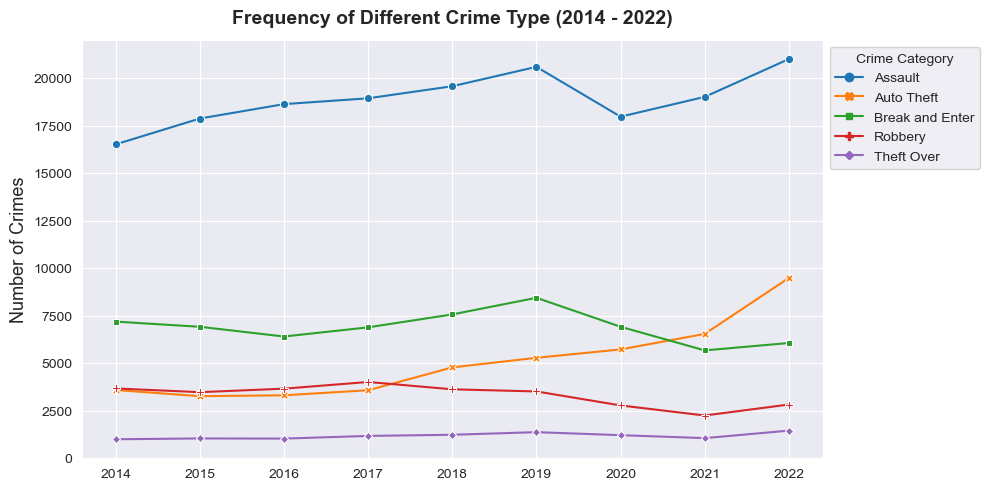

In [133]:
# Create a line plot using Seaborn
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")  
fig=sns.lineplot(data=crime_year, markers=True, palette='tab10',dashes=False)
plt.title('Frequency of Different Crime Type (2014 - 2022)',y=1.02,fontsize=14,fontweight='bold')
plt.xlabel('')
plt.ylabel('Number of Crimes',fontsize=13)
plt.legend(title='Crime Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('crime_trend.png',bbox_inches = 'tight')
plt.show()

### Key Findings:
1. Assault has consistently been the most commonly reported crime between 2014 and 2022.

2. Between 2014 and 2020, Break and Enter was the second most frequently reported crime. However, in 2021 and 2022, Auto Theft surpassed Break and Enter in frequency.

3. Starting in 2016 and continuing until 2019, Break and Enter showed a steady increase in reported cases. However, after 2019, both Break and Enter and Robbery have been on a consistent decline. In contrast, Auto Theft has been rapidly increasing during this period and now it is the second most frequently reported crime.

In [134]:
# finding the number of offences reported in each premises from 2014 - 2022
crime_premise=data.groupby('PREMISES_TYPE').agg({'OFFENCE':'count'}).reset_index()
crime_premise

,PREMISES_TYPE,OFFENCE
0,Apartment,76153
1,Commercial,63784
2,Educational,8095
3,House,57500
4,Other,18887
5,Outside,84367
6,Transit,9182


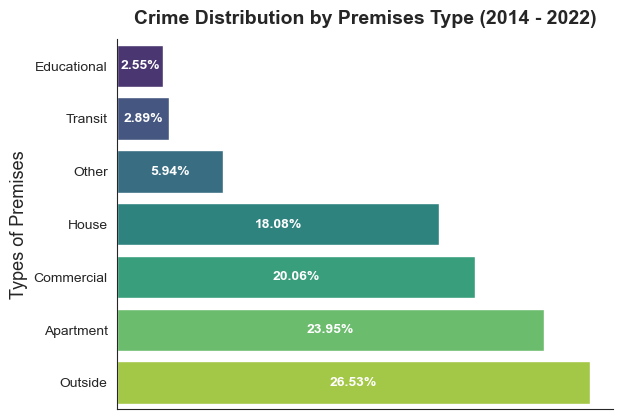

In [135]:
sns.set_style('white')
# Calculate the percentages
crime_premise['Percentage'] = ((crime_premise['OFFENCE'] / crime_premise['OFFENCE'].sum()) * 100)

# Sort the DataFrame by 'Percentage' in ascending order
crime_premise = crime_premise.sort_values(by='Percentage')

# Set the style
# sns.set_style('darkgrid')

# Create a bar plot
ax = sns.barplot(data=crime_premise, y='PREMISES_TYPE', x='Percentage', palette='viridis')

# Annotate the bars with their percentages
for p in ax.patches:
    percentage = p.get_width()
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=10, color='white',weight='bold')  # Adjust color and position

# Set the x-axis label
plt.xlabel('')
plt.xticks([])

# Set the y-axis label
plt.ylabel('Types of Premises',fontsize=13)

plt.title('Crime Distribution by Premises Type (2014 - 2022)',y=1.02,fontsize=14,fontweight='bold')
sns.despine()
# Show the plot
plt.savefig('crime_premises.png',bbox_inches = 'tight')
plt.show()


### Key Findings:
1. A significant portion, accounting for 26.53% of all offenses, occurred in outdoor areas such as streets, roads, highways, parking lots, etc. These locations were the most common settings for criminal incidents.

2. The second most prevalent premises for criminal activities, with 23.95% of offenses, were apartments, including rooming houses and condos, during the period from 2014 to 2022.

3. Commercial dwelling units (hotels, motels, B & Bs), corporate establishments (for-profit organizations), and convenience stores constituted the third most frequent premises, where 20.06% of crimes took place.

4. Houses accounted for 18.08% of reported crimes, making them the fourth most common setting for criminal incidents.

5. In transit locations such as TTC subway stations, Go Train stations, and Go stations, there was a reported occurrence of 2.89% of crimes.

6. Other Premises which includes Hospitals, institutions, medical facilities, retirement homes, pharmacies, and homeless shelters collectively witnessed 5.94% of reported crimes.

7. Educational institutions, including schools during unsupervised activities, universities, and colleges, reported the lowest number of crimes, with only 2.55% occurring on their premises.

In [136]:
result = pd.crosstab(data['REPORT_YEAR'], data['day_parts'], values=data['MCI_CATEGORY'], aggfunc='count')
result = result.reset_index()
result = result.rename_axis(None, axis=1)
# result.describe().T
result

,REPORT_YEAR,Afternoon,Evening,Morning,Night
0,2014,7704,6705,5627,11908
1,2015,7579,6643,5798,12534
2,2016,7638,6942,5717,12727
3,2017,8230,7310,5761,13270
4,2018,8674,7673,6272,14145
5,2019,8921,7934,6905,15429
6,2020,7728,7766,5606,13487
7,2021,7841,7608,5488,13579
8,2022,8968,8559,6628,16664


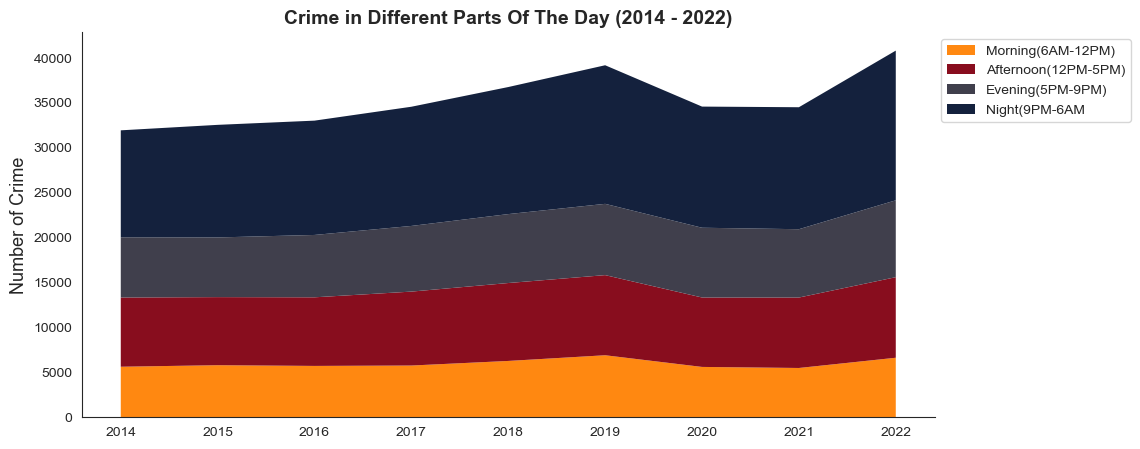

In [137]:
sns.set_style('white')
plt.figure(figsize=(11,5))
# defining the colors for each parts of the day
color=['#ff8811','#880d1e','#403f4c','#14213d']

# making the stackplot
plt.stackplot(result['REPORT_YEAR'],
              result['Morning'],
              result['Afternoon'],
              result['Evening'],
              result['Night'],
              edgecolor='none',
              colors=color
             )

label=['Morning(6AM-12PM)','Afternoon(12PM-5PM)','Evening(5PM-9PM)','Night(9PM-6AM']
plt.legend(labels=label,loc='upper left',bbox_to_anchor=(1,1))
plt.ylabel('Number of Crime',fontsize=13)
plt.title('Crime in Different Parts Of The Day (2014 - 2022)',fontsize=14,weight='bold')
sns.despine()
plt.savefig('crime_day_part.png',bbox_inches = 'tight')
plt.show()

## Key Findings:
1. Predominantly, criminal incidents exhibited a proclivity for nighttime occurrences, with the hours spanning from 9:00 PM to 6:00 AM recording the highest frequency.

2. The second most frequently observed time frame for criminal activities fell within the afternoon period, spanning from 12:00 PM to 5:00 PM.

3. Subsequently, the evening hours, ranging from 5:00 PM to 9:00 PM, emerged as the third most prevalent temporal window for reported criminal incidents.

4. Morning hours, commencing at 6:00 AM and extending until 12:00 PM, represented the fourth most common time segment for the reporting of criminal events.

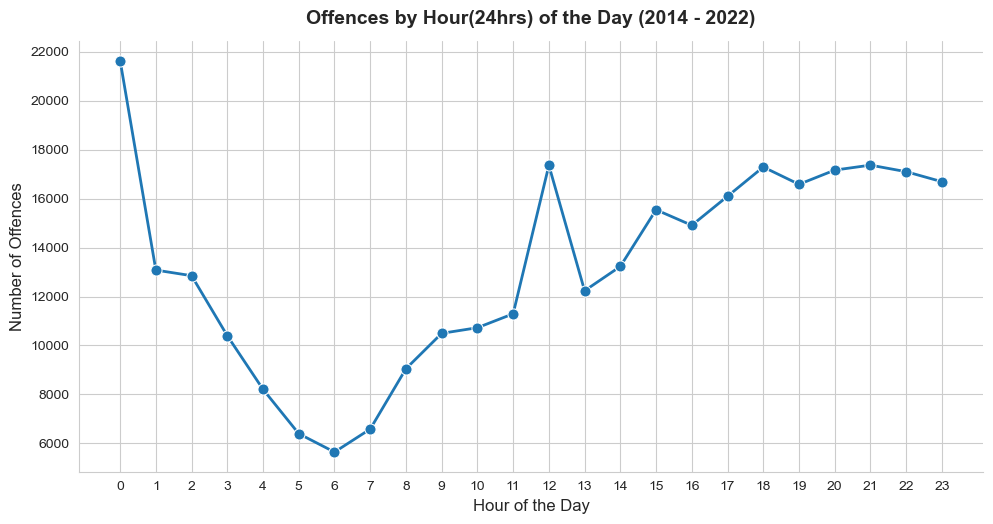

In [138]:
# count offence by each hour
offence_hour=data.groupby('OCC_HOUR')['OFFENCE'].count().reset_index()

# Set the style
sns.set_style('whitegrid')

# Create a line plot with custom style
sns.relplot(data=offence_hour, kind='line',x='OCC_HOUR',y='OFFENCE', aspect=2, marker='o', 
            linewidth=2, markersize=8)

# Set the x-ticks to represent each hour of the day (0 to 23)
plt.xticks(np.arange(0,24,1))

# Set the x-axis label
plt.xlabel('Hour of the Day',fontsize=12)
plt.ylabel('Number of Offences',fontsize=12)

# Set the title
plt.title('Offences by Hour(24hrs) of the Day (2014 - 2022)',y=1.02,fontsize=14,fontweight='bold')

# Show the plot
plt.savefig('crime_24hours.png',bbox_inches = 'tight')
plt.show()





### Key Findings:
1. The observations gleaned from the stack area plot align closely with the trends discerned in the line chart displayed above.

2. The hours spanning from 6:00 PM to 12:00 AM exhibit the highest frequency of reported criminal incidents, establishing this time frame as the period with the most substantial crime occurrence.

3. In the time interval between 2:00 AM and 6:00 AM, a notable decline in reported crimes is observed, indicating a distinct decrease during these early morning hours.

4. Subsequent to the early morning hours, there is a sharp rise in reported criminal activities from 6:00 AM to 12:00 PM, followed by another pronounced upswing in incidents from 1:00 PM to 6:00 PM. These trends denote distinct patterns of crime incidence during different times of the day.

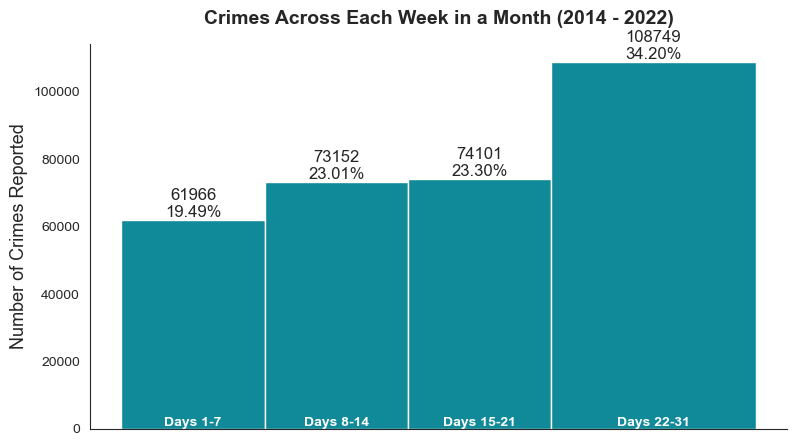

In [139]:
# Define custom bin edges (intervals) for 4 bins
bin_edges = [0, 7, 14, 21, 31]  # Adjusted for 4 bins

sns.set_style('white')
plt.figure(figsize=(9, 5))
hist_data, _, _ = plt.hist(data['REPORT_DAY'], bins=bin_edges, color='#108A99')

total_crimes = len(data)  # Total number of crimes in the dataset

# Annotate each bar with its label (centered) and percentage
for i in range(len(hist_data)):
    x = (bin_edges[i] + bin_edges[i + 1]) / 2  # Calculate the center of the bar
    percentage = (hist_data[i] / total_crimes) * 100  # Calculate percentage
    plt.text(x, hist_data[i], f'{int(hist_data[i])}\n{percentage:.2f}%', ha='center', va='bottom', fontsize=12)

    # Add interval labels below each bin's center
    plt.text(x, -5, f'Days {bin_edges[i] + 1}-{bin_edges[i + 1]}', ha='center', va='bottom',
             fontsize=10, color='white', weight='bold')

# Set labels and title
plt.xticks([])  # Remove x-axis ticks
plt.xlabel('')
plt.ylabel('Number of Crimes Reported', fontsize=13)
plt.title('Crimes Across Each Week in a Month (2014 - 2022)', y=1.03, fontsize=14, weight='bold')

# Show the plot
sns.despine()
plt.savefig('crime_weeks.png', bbox_inches='tight')
plt.show()


### Key Findings:

1. A notable majority of criminal incidents, accounting for 34.20%, were reported during the fourth week of the month.

2. Conversely, the first week experienced the lowest occurrence of crimes, representing only 19.49% of the total.

3. Weeks three and four witnessed a relatively consistent number of criminal incidents, with approximately 23% cases reported during each of these weeks.

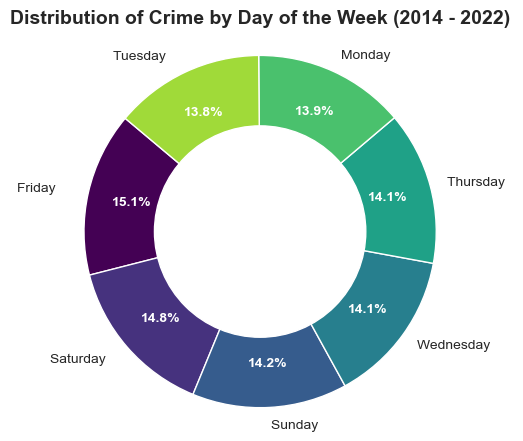

In [140]:
crime_DOW=data.groupby('OCC_DOW')['OFFENCE'].count().reset_index()
# crime_DOW

# Calculate percentages
crime_DOW['Percentage'] = (crime_DOW['OFFENCE'] / crime_DOW['OFFENCE'].sum()) * 100

# Sort the DataFrame by percentage in descending order
crime_DOW = crime_DOW.sort_values(by='Percentage', ascending=False).head(10)

# Create a Viridis colormap
cmap = plt.get_cmap('viridis')

# Create a pie chart with gradient colors based on the percentage
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(
    crime_DOW['Percentage'],
    labels=crime_DOW['OCC_DOW'],
    autopct='%1.1f%%',
    startangle=140,
    colors=[cmap(i / len(crime_DOW)) for i in range(len(crime_DOW))],
    pctdistance=0.75,
)

# Draw a white circle at the center to create a donut-like chart
center_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Set percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    
# Set title
plt.title('Distribution of Crime by Day of the Week (2014 - 2022)',y=1.02,fontsize=14,weight='bold')

# Show the donut chart
plt.savefig('crime_days.png',bbox_inches = 'tight')
plt.show()

### Key Findings:
1. The frequency of reported crimes remains relatively uniform throughout the week, without any notable variations among the days.

2. There is no discernible trend indicating a specific day of the week as the primary day for the occurrence of most criminal incidents, signifying the absence of day-specific patterns in crime occurence.

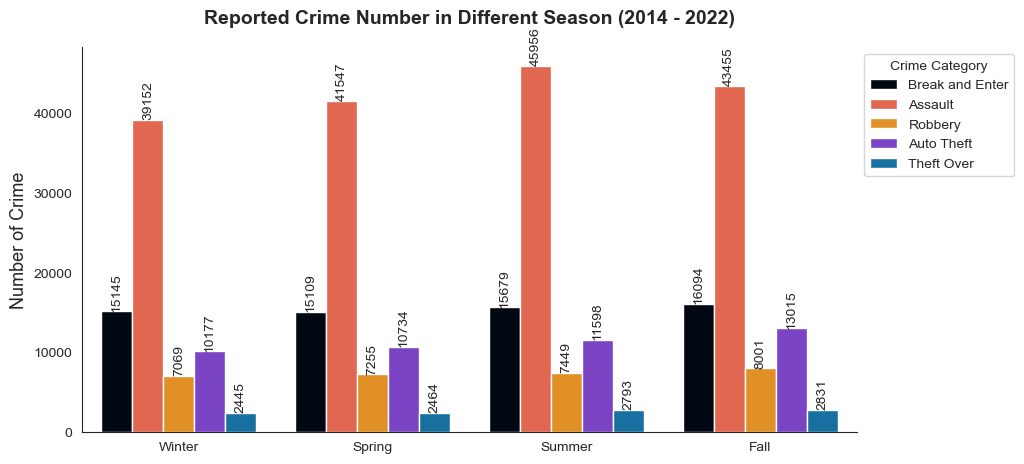

In [141]:
# Set the style
sns.set_style('white')

# Create a figure with a specific figsize
fig, ax = plt.subplots(figsize=(10, 5))  # Adjust the width and height as needed

# Define custom colors for each 'MCI_CATEGORY'
custom_colors = {'Break and Enter': '#000814', 'Assault': '#f95738', 'Robbery': '#ff9505',
                 'Auto Theft': '#772fda','Theft Over':'#0077b6'}

# Create the countplot with custom colors and specify the 'ax' parameter
sns.countplot(data=data, x='season', hue='MCI_CATEGORY', palette=custom_colors, ax=ax)

# Add text labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', rotation=90, fontsize=10)

# Add legend
plt.legend(title='Crime Category', loc='upper left', bbox_to_anchor=(1, 1))

# Set figure title and labels
plt.title('Reported Crime Number in Different Season (2014 - 2022)', y=1.04, fontsize=14, weight='bold')
plt.xlabel('')
plt.ylabel('Number of Crime',fontsize=13)
sns.despine()

# Show the plot
plt.savefig('crime_season.png',bbox_inches = 'tight')
plt.show()


### Key Findings:
1. Assault consistently emerges as the most prevalent crime across all seasons. Its occurrence exhibits a slight elevation during the summer months and a slight decrease during the winter season.

2. Robbery and Theft Over consistently rank as the least frequent crimes across all seasons, with their frequencies remaining relatively stable throughout the year.

3. Break and Enter stands as the second most common crime, maintaining a consistent frequency across all seasons except for the fall, where it experiences a slight increase.

4. Auto theft exhibits a modest rise during the summer season and reaches its peak during the fall, marking the highest frequency among the seasons.

### High Crime Frequency Area(Top 50): 


In [142]:

high_crime_area=data.groupby('NEIGHBOURHOOD_158')['OFFENCE'].count().sort_values(ascending=False)
high_crime_area = high_crime_area.reset_index()
high_crime_area.head()

,NEIGHBOURHOOD_158,OFFENCE
0,West Humber-Clairville,8803
1,Moss Park,7746
2,Downtown Yonge East,6840
3,Yonge-Bay Corridor,6495
4,Wellington Place,6236


In [144]:
data['REPORT_DATE'] = pd.to_datetime(data['REPORT_DATE'])

# Group by 'NEIGHBOURHOOD_158' and calculate the minimum and maximum dates
crime_duration = data.groupby('NEIGHBOURHOOD_158')['REPORT_DATE'].agg(['min', 'max']).reset_index()

#  Convert 'min' and 'max' to datetime objects
crime_duration['min'] = pd.to_datetime(crime_duration['min'])
crime_duration['max'] = pd.to_datetime(crime_duration['max'])

# Calculate the difference in days between 'max' and 'min'
crime_duration['duration_days'] = (crime_duration['max'] - crime_duration['min']).dt.days

# Calculate the duration in weeks
crime_duration['duration_weeks'] = crime_duration['duration_days'] // 7

In [145]:
area=data[['NEIGHBOURHOOD_158','LONG_WGS84','LAT_WGS84']]

# Merge 'high_crime_area' with 'area' using a left join
crime_loc = pd.merge(high_crime_area, area, how='inner', on='NEIGHBOURHOOD_158')

# Drop duplicates based on the 'NEIGHBOURHOOD_158' column, keeping only the first occurrence
crime_loc = crime_loc.drop_duplicates(subset='NEIGHBOURHOOD_158', keep='first')

# Now 'merged_df' contains one record for each neighborhood
crime_location = crime_loc.sort_values(by='OFFENCE',ascending=False)
crime_location.head()

,NEIGHBOURHOOD_158,OFFENCE,LONG_WGS84,LAT_WGS84
0,West Humber-Clairville,8803,-79.600737,43.731827
8803,Moss Park,7746,-79.372758,43.655602
16549,Downtown Yonge East,6840,-79.380311,43.656454
23389,Yonge-Bay Corridor,6495,-79.386412,43.658168
29884,Wellington Place,6236,-79.391841,43.646639


In [146]:
crime_loc_dur = crime_location.merge(crime_duration,on = 'NEIGHBOURHOOD_158')
crime_loc_dur = crime_loc_dur.drop_duplicates(subset='NEIGHBOURHOOD_158', keep='first').sort_values(by='OFFENCE',ascending=False)
crime_loc_dur.head()

,NEIGHBOURHOOD_158,OFFENCE,LONG_WGS84,LAT_WGS84,min,max,duration_days,duration_weeks
0,West Humber-Clairville,8803,-79.600737,43.731827,2014-01-03 05:00:00+00:00,2022-12-31 05:00:00+00:00,3284,469
1,Moss Park,7746,-79.372758,43.655602,2014-01-02 05:00:00+00:00,2022-12-31 05:00:00+00:00,3285,469
2,Downtown Yonge East,6840,-79.380311,43.656454,2014-01-02 05:00:00+00:00,2022-12-31 05:00:00+00:00,3285,469
3,Yonge-Bay Corridor,6495,-79.386412,43.658168,2014-01-01 05:00:00+00:00,2022-12-30 05:00:00+00:00,3285,469
4,Wellington Place,6236,-79.391841,43.646639,2014-01-01 05:00:00+00:00,2022-12-31 05:00:00+00:00,3286,469


In [147]:
import folium

# Create a map centered at a location (e.g., Toronto)
m = folium.Map(location=[43.70, -79.40], zoom_start=11)  # Adjust center and zoom as needed

# Add a title to the map
title = "<h4 style='text-align:center;'>Area Having High Crime Frequency(Top 50)</h4>"
folium.Marker(
    location=[43.71, -79.41],  # Adjust the location for the title as needed
    icon=folium.DivIcon(html=title),
).add_to(m)

# Iterate through the rows of the merged dataframe
for index, row in crime_loc_dur.head(50).iterrows():
    neighborhood = row['NEIGHBOURHOOD_158']
    longitude = row['LONG_WGS84']
    latitude = row['LAT_WGS84']
    offense_count = row['OFFENCE']

    # Customize the marker's transparency and size
    marker = folium.Marker(
        [latitude, longitude],
        tooltip=f'{neighborhood}: {offense_count} offenses',
        icon=folium.Icon(
            icon='star',  # You can choose a different icon if needed
            icon_color='blue',  # Change the marker's color as desired
            icon_size=(0, 0)  # Adjust the marker's size as desired
#             icon_opacity=0.8  # Adjust opacity (0.0 - 1.0) for transparency
        )
    )
    marker.add_to(m)

# Display the map
m.save('crime_map.html')
m


In [148]:
import folium
from folium import plugins

# Create a map centered at a location (e.g., Toronto)
m = folium.Map(location=[43.70, -79.40], zoom_start=11)  # Adjust center and zoom as needed

# Add a title to the map
title = "<h4 style='text-align:center;'>Crime Area Heatmap</h4>"
folium.Marker(
    location=[43.71, -79.41],  # Adjust the location for the title as needed
    icon=folium.DivIcon(html=title),
).add_to(m)

# Create a list of data points for the heatmap
heat_data = []
for index, row in crime_location.iterrows():
    latitude = row['LAT_WGS84']
    longitude = row['LONG_WGS84']
    heat_data.append([latitude, longitude])

# Create a heatmap layer with custom blur radius for transparency control
heatmap = plugins.HeatMap(heat_data, blur=40)  # Adjust the blur value as needed

# Add the heatmap layer to the map
heatmap.add_to(m)

# Display the map
m.save('crime_heatmap.html')
m

In [149]:
# finding top 10 area where number of crime per week is highest
crime_loc_dur['offence_in_week'] = crime_loc_dur['OFFENCE'] // crime_loc_dur['duration_weeks']
crime_loc_dur[['NEIGHBOURHOOD_158','OFFENCE','offence_in_week']].sort_values('offence_in_week',ascending=False).head(20)

,NEIGHBOURHOOD_158,OFFENCE,offence_in_week
0,West Humber-Clairville,8803,18
1,Moss Park,7746,16
2,Downtown Yonge East,6840,14
4,Wellington Place,6236,13
5,York University Heights,6222,13
3,Yonge-Bay Corridor,6495,13
6,Kensington-Chinatown,5796,12
7,West Hill,5091,10
8,Annex,4738,10
9,Glenfield-Jane Heights,4374,9


In [150]:
crime_loc_dur.offence_in_week.describe()

count    158.000000
mean       3.791139
std        3.020216
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       18.000000
Name: offence_in_week, dtype: float64

### Key Findings:
1. Among the neighborhoods examined, there exists a range in the number of reported offenses per week, with the highest count reaching 18 and the lowest recording just 1.

2. Certain neighborhoods, including but not limited to West Humber-Clairville, Moss Park, Downtown Yonge East, Wellington Place, York University Heights, Yonge-Bay Corridor, and Kensington-Chinatown, consistently exhibit a higher incidence of reported offenses compared to other areas.

3. The majority of neighborhoods consistently report a minimum of three offenses per week, demonstrating a consistent level of criminal activity across the majority of locales.

C:\Users\iamsuzank\AppData\Local\Temp\ipykernel_15836\1424757830.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



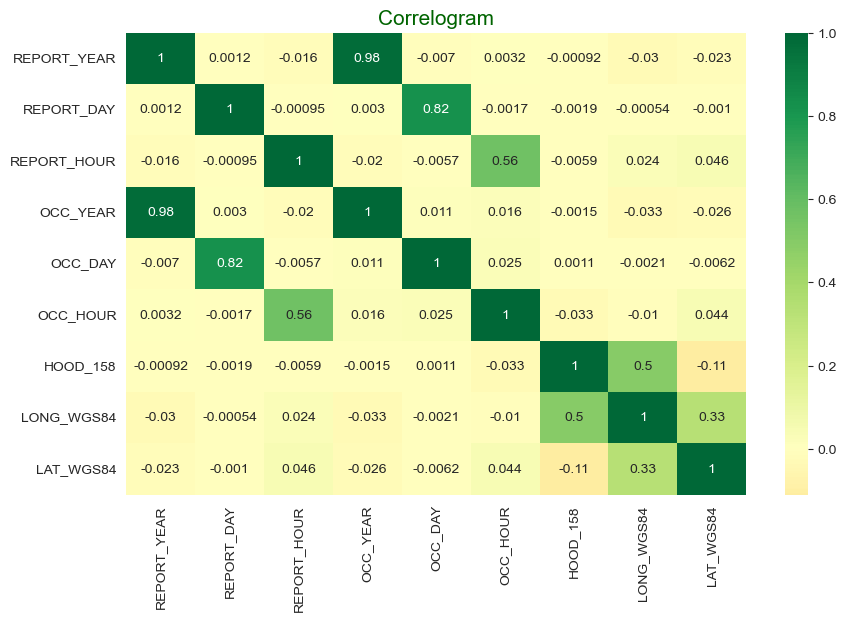

In [152]:
corr = data.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()